<a href="https://colab.research.google.com/github/raviyadav44/PUBG_EDA/blob/main/PUBG_EDA_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PUBG EDA TASK
<br>
NAME: Ravi Yadav
<br>
linkedIn:https://www.linkedin.com/in/ravi-yadav-471508193/

#Datacleaning

In [1]:
#importing necessarey liberaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Using matplotlib backend: agg


In [2]:
#loading the data file
df=pd.read_csv("/content/drive/MyDrive/Pubg_eda/data (1).csv")

In [3]:
df.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,84,1437,0,0,0.000,1403,squad-fpp,31,29,-1,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,57,1225,0,0,0.000,1971,squad-fpp,30,30,-1,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,50,0,0,0,0.000,1741,solo-fpp,96,89,1516,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,56,1286,0,0,0.000,1738,squad-fpp,28,27,-1,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,31,0,1,1,7.737,2193,solo,99,95,1482,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [4]:
df.columns

Index(['Unnamed: 0', 'Id', 'groupId', 'matchId', 'assists', 'boosts',
       'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 30 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1111742 non-null  int64  
 1   Id               1111742 non-null  object 
 2   groupId          1111742 non-null  object 
 3   matchId          1111742 non-null  object 
 4   assists          1111742 non-null  int64  
 5   boosts           1111742 non-null  int64  
 6   damageDealt      1111742 non-null  float64
 7   DBNOs            1111742 non-null  int64  
 8   headshotKills    1111742 non-null  int64  
 9   heals            1111742 non-null  int64  
 10  killPlace        1111742 non-null  int64  
 11  killPoints       1111742 non-null  int64  
 12  kills            1111742 non-null  int64  
 13  killStreaks      1111742 non-null  int64  
 14  longestKill      1111742 non-null  float64
 15  matchDuration    1111742 non-null  int64  
 16  matchType        1

In [6]:
#getting rid of all the id coulums as they are not much contributing to the prediction
pubg=df.drop(['Unnamed: 0', 'Id', 'groupId', 'matchId'],axis=1)

In [7]:
pubg.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,25.93,0,0,0,84,1437,0,0,0.000,1403,squad-fpp,31,29,-1,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,0,0,36.71,0,0,0,57,1225,0,0,0.000,1971,squad-fpp,30,30,-1,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,0,1,47.73,0,0,0,50,0,0,0,0.000,1741,solo-fpp,96,89,1516,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,0,0,0.00,0,0,0,56,1286,0,0,0.000,1738,squad-fpp,28,27,-1,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,0,2,100.00,0,0,3,31,0,1,1,7.737,2193,solo,99,95,1482,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [8]:
pubg.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111741e+06
mean,2.336738e-01,1.106655e+00,1.307364e+02,6.573612e-01,2.266488e-01,1.370348e+00,4.759562e+01,5.044301e+02,9.255097e-01,5.448503e-01,2.299814e+01,1.579348e+03,4.450584e+01,4.300693e+01,8.927902e+02,1.641784e-01,6.042142e+02,3.551184e-03,4.545068e+00,2.401097e-02,7.833652e-03,1.153282e+03,3.659685e+00,6.057065e+02,4.727868e-01
std,5.894028e-01,1.716050e+00,1.711755e+02,1.146023e+00,6.033356e-01,2.683819e+00,2.747025e+01,6.274006e+02,1.562216e+00,7.129032e-01,5.106977e+01,2.589348e+02,2.381989e+01,2.327841e+01,7.366443e+02,4.704189e-01,1.495949e+03,7.385452e-02,3.061857e+01,1.678909e-01,9.194621e-02,1.182788e+03,2.461805e+00,7.395140e+02,3.073771e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.367000e+03,2.800000e+01,2.700000e+01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.552000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.411000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.438000e+03,3.000000e+01,3.000000e+01,1.444000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.841000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.859000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.171000e+03,1.000000e+00,1.000000e+00,2.133000e+01,1.851000e+03,4.900000e+01,4.700000e+01,1.500000e+03,0.000000e+00,7.927500e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.975000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,1.700000e+01,2.400000e+01,5.990000e+03,3.500000e+01,6.400000e+01,7.300000e+01,1.000000e+02,2.170000e+03,7.200000e+01,2.000000e+01,1.040000e+03,2.237000e+03,1.000000e+02,1.000000e+02,5.910000e+03,2.300000e+01,3.540000e+04,1.400000e+01,2.668000e+03,1.000000e+01,5.000000e+00,1.396000e+04,1.770000e+02,2.002000e+03,1.000000e+00


In [9]:
pubg.isnull().sum()

assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

###so as we can see there is no null value except winPlacePerc 

In [10]:
pubg.shape

(1111742, 26)

In [11]:
pubg.dropna(axis=0,inplace=True)

In [12]:
pubg.shape

(1111741, 26)

###Since match type is in Object we can try changing it to Categorical variables as the ML algorithms do not do well with text data

In [13]:
pubg['matchType'].unique()

array(['squad-fpp', 'solo-fpp', 'solo', 'duo', 'duo-fpp', 'squad',
       'normal-squad-fpp', 'normal-duo-fpp', 'normal-solo-fpp',
       'crashfpp', 'crashtpp', 'normal-squad', 'flaretpp', 'flarefpp',
       'normal-duo', 'normal-solo'], dtype=object)

In [14]:
pubg['matchType']=pd.Categorical(pubg['matchType'],['squad-fpp', 'solo-fpp', 'solo', 'duo', 'duo-fpp', 'squad',
       'normal-squad-fpp', 'normal-duo-fpp', 'normal-solo-fpp',
       'crashfpp', 'crashtpp', 'normal-squad', 'flaretpp', 'flarefpp',
       'normal-duo', 'normal-solo'],ordered=True)

In [15]:
pubg['matchType'].head()

0    squad-fpp
1    squad-fpp
2     solo-fpp
3    squad-fpp
4         solo
Name: matchType, dtype: category
Categories (16, object): ['squad-fpp' < 'solo-fpp' < 'solo' < 'duo' ... 'flaretpp' < 'flarefpp' <
                          'normal-duo' < 'normal-solo']

In [16]:
pubg['matchType'].cat.codes.head()

0    0
1    0
2    1
3    0
4    2
dtype: int8

###so the categorical variables are changed to numeric ordered variables

In [17]:
pubg.duplicated().sum()

204

###so we find that there are 204 duplicate rows in our data set which is not a good thing so getting rid of the duplicate values by keeping only the first occurance

In [18]:
pubg.shape

(1111741, 26)

In [19]:
pubg.drop_duplicates(keep='first',inplace=True)

In [20]:
pubg.shape

(1111537, 26)

#Data Visualisation

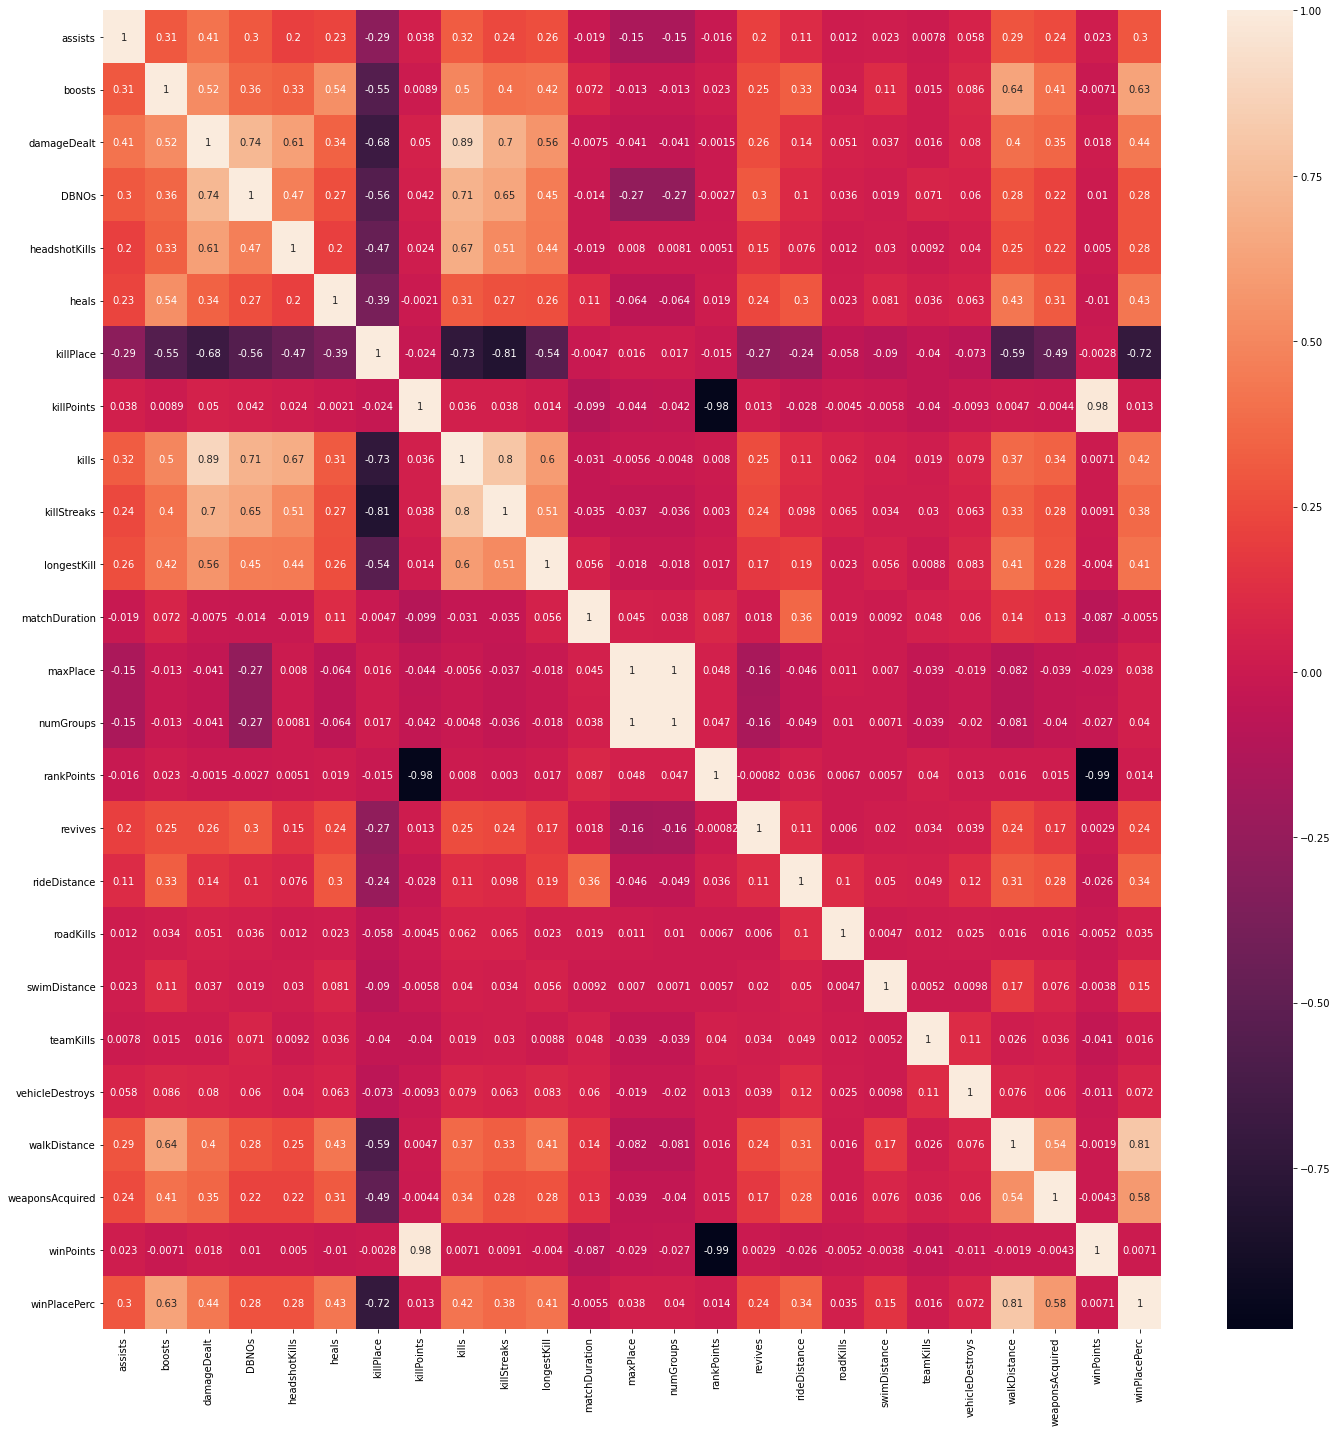

In [21]:
#correlation matrix 
plt.figure(figsize=(20,20))
x=pubg.corr()
sns.heatmap(x,annot=True)
plt.tight_layout()
#also check for multicollinearity


###From the Above confusion matrix it is clear that many columns are correlated with each other this is known as multi-colinearity this could be a bad thing for ml models we can reduce this by using some feature extraction techiniques like PCA ,LDA and all.

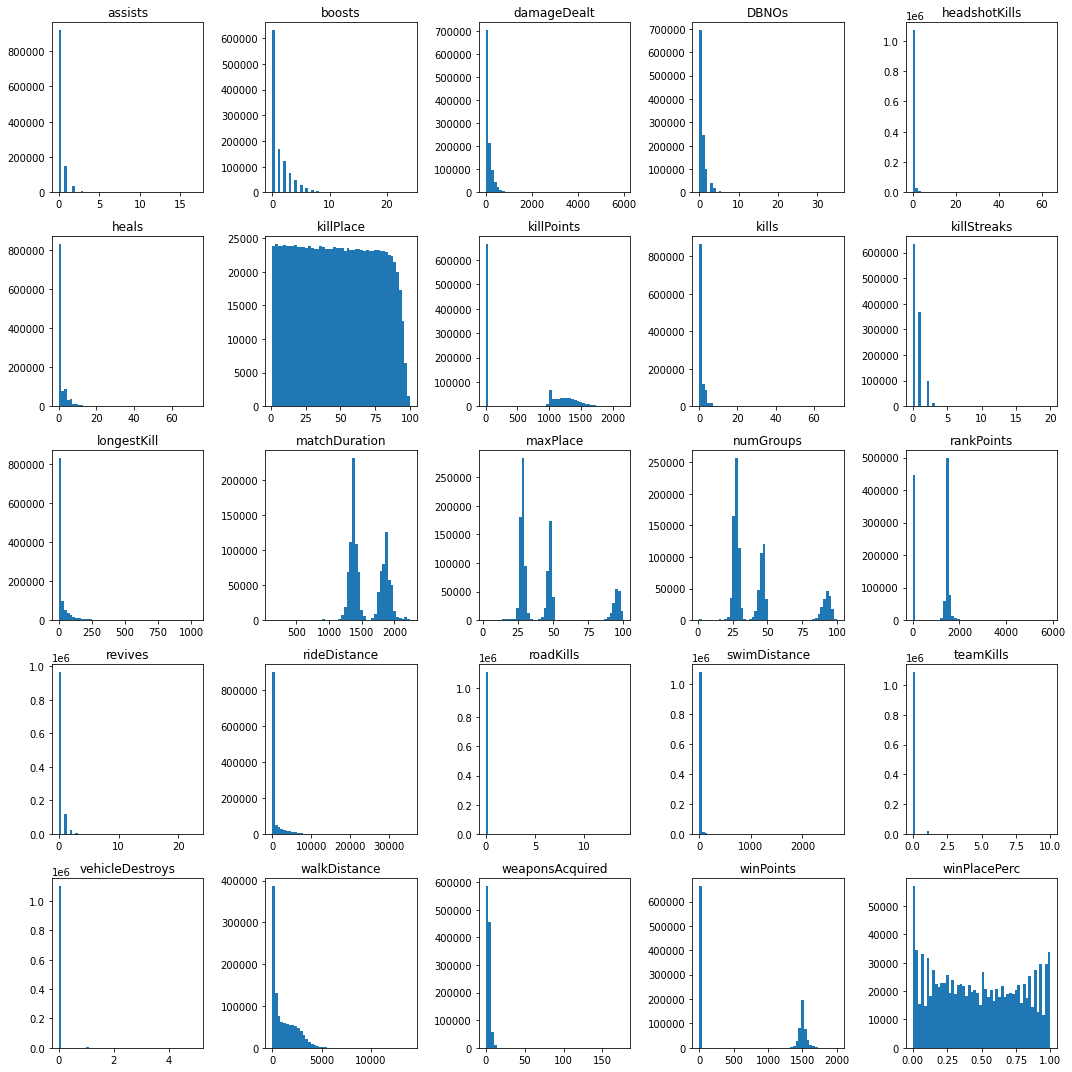

In [22]:
#distribution of data following normal distribution or not
pubg.hist(bins=50,figsize=(15,15),grid=False)
plt.tight_layout()

###From the histogrm we can infer that most of our features dont follow a gaussian distribution,that is they are following a right-skewed distribution.

In [23]:
x=pubg.drop('matchType',axis=1)

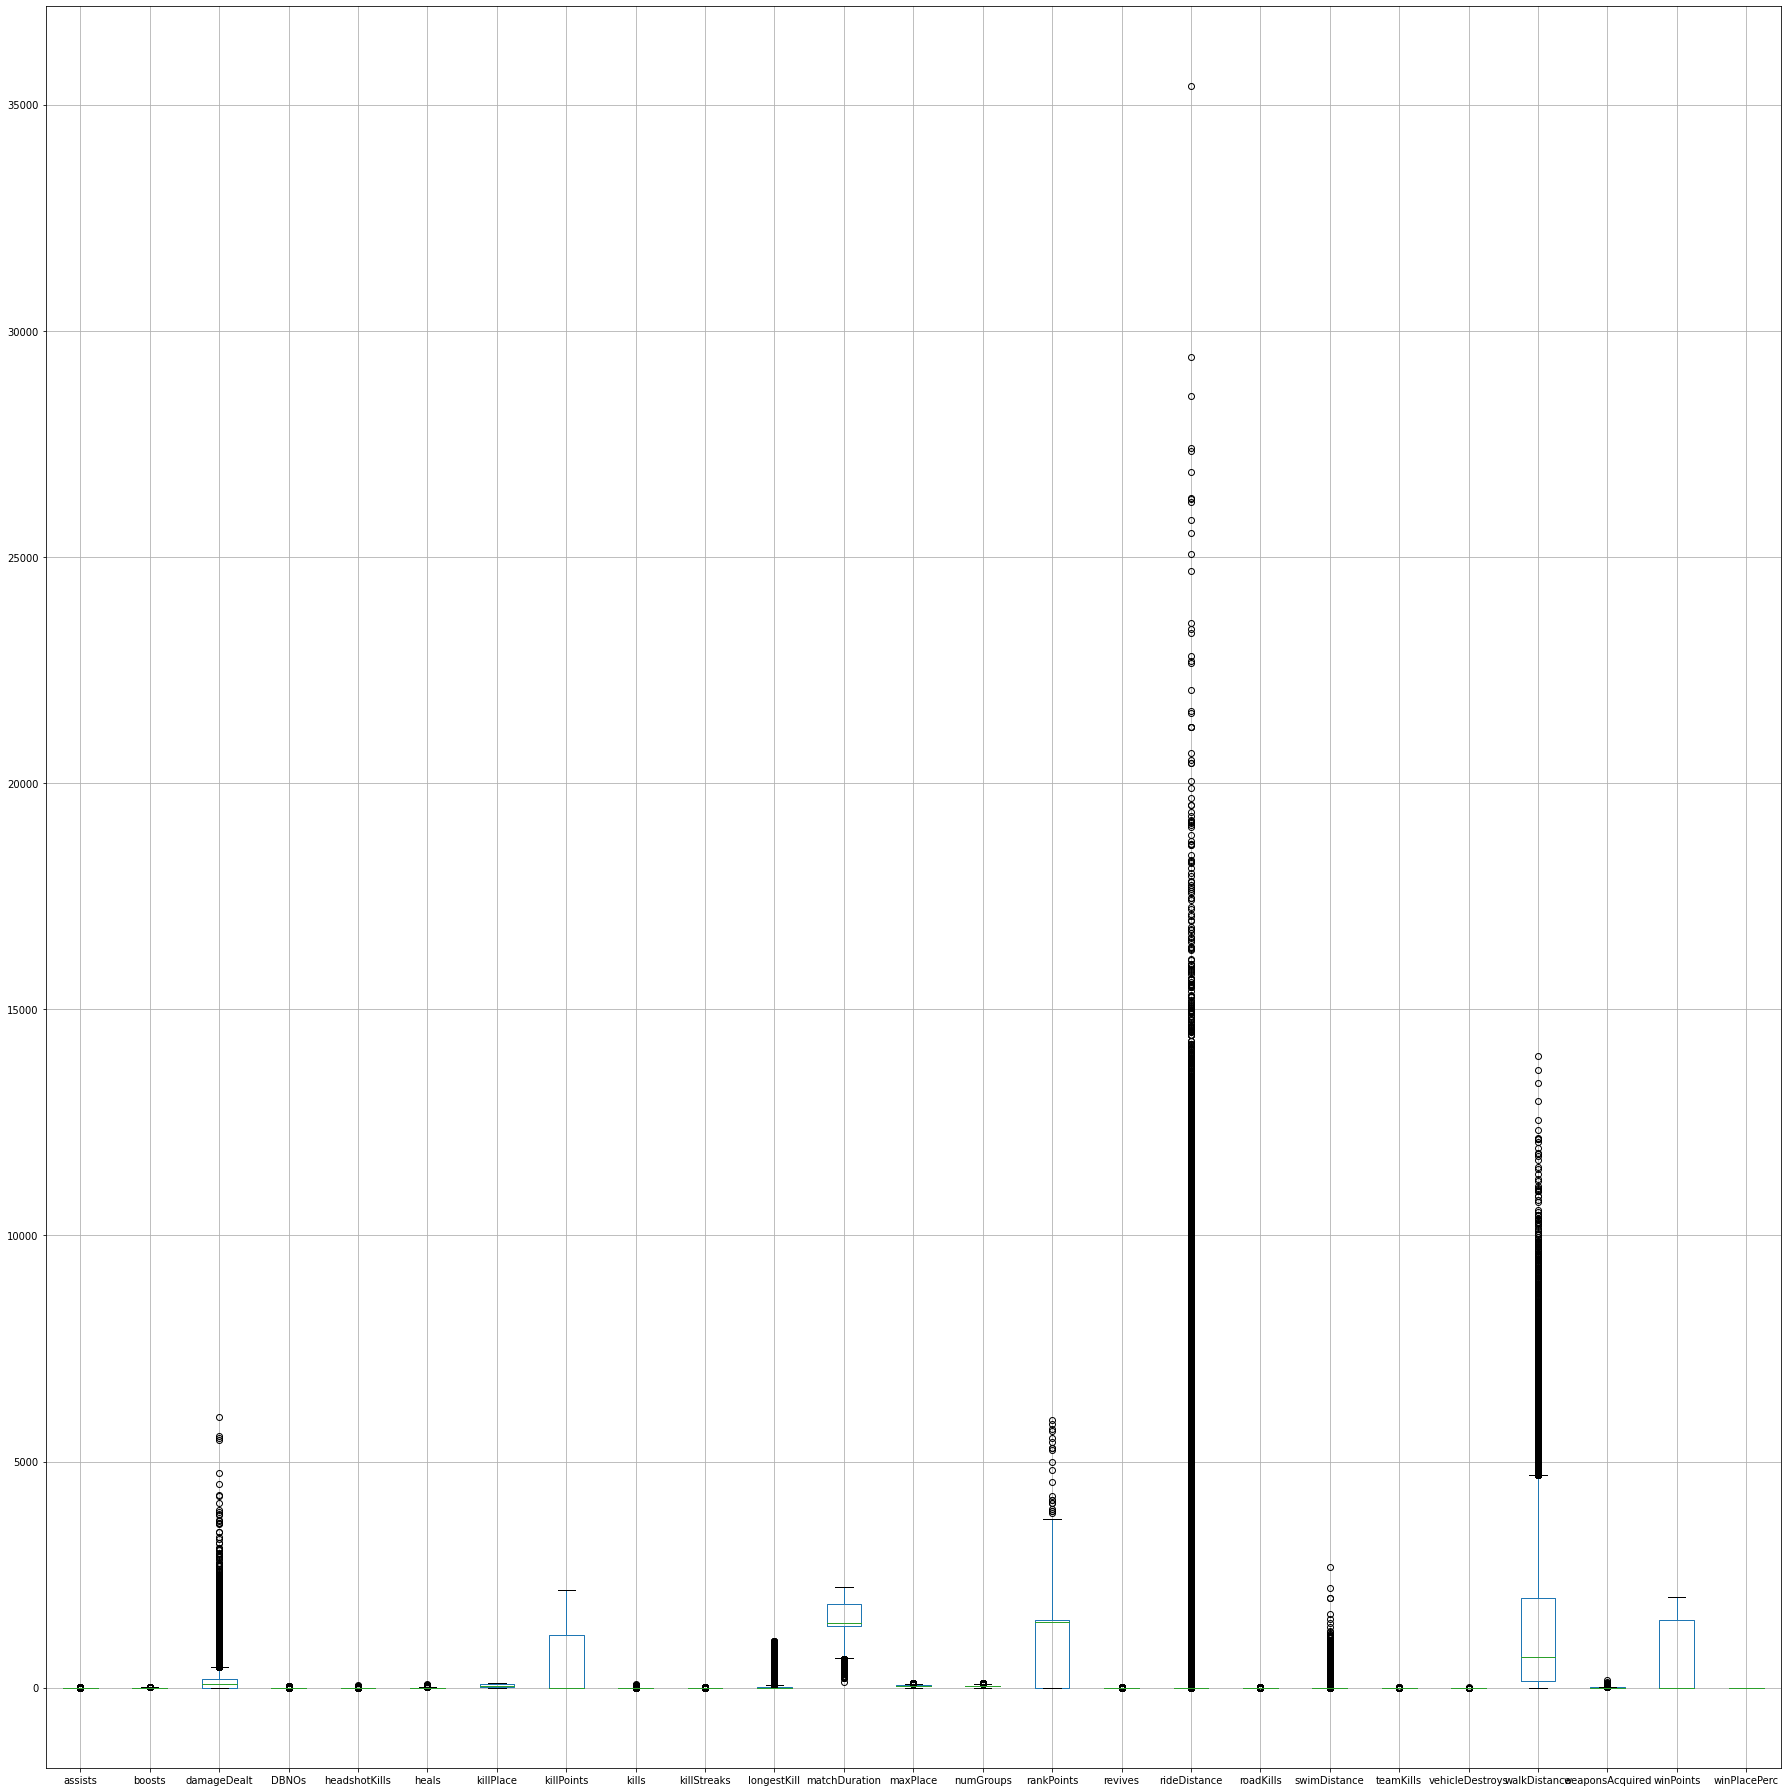

In [24]:
#check for outilers using box plot
pubg.boxplot(figsize=(25,25))
plt.tight_layout()

###by anylazing the above box plot we can say that the columns 'damageDealt', 'longestKill', 'rideDistance' ,'swimDistance' ,'walkDistance' have Outliers.<br>
###Also '**rideDistance**' has the highest number of Outliers present

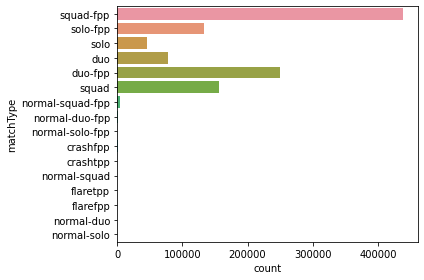

In [25]:
#checking count plot on categorical value i.e matched type
#plt.figure(figsize=(10,7))
sns.countplot(y=pubg['matchType'])
plt.tight_layout()

###so from the above graph we can see that most of the players used to prefer playing pubg in 'squadd-fpp'.

#Applying PCA

In [26]:
#calculating the variance of the data set using PCA
sc = StandardScaler()
pubg['matchType']=pubg['matchType'].cat.codes
pubg_s = sc.fit_transform(pubg)


In [28]:
pca = PCA(n_components=10)
pubg_s = pca.fit_transform(pubg_s)

In [29]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.26068167, 0.11576511, 0.08205376, 0.07690317, 0.04774426,
       0.04034409, 0.03858724, 0.03761583, 0.03695057, 0.03454682])

###these are the top 10 PCA 

#K-Mean

###just for getting a rough idea of data set we can apply K-mean so finding is there any grouping inside it or not.

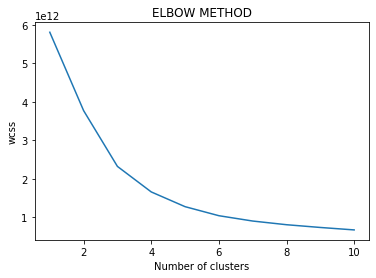

In [30]:
from sklearn.cluster import KMeans
wcss = [] #within cluster sum of square
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(pubg)#providing the features which are not standardise
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('ELBOW METHOD')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

###further we can find the number of cluster by using elbow method or any other techinique

###with supplying pubg_s as a feature which is nothing but the standardise feature considering the top 10 PCAs.

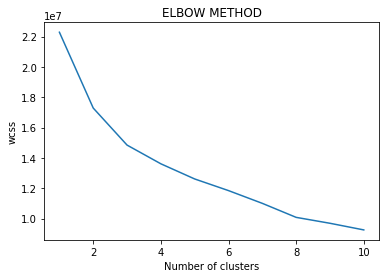

In [31]:
from sklearn.cluster import KMeans
wcss = [] #within cluster sum of square
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(pubg_s)#providing the features which are not standardise
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('ELBOW METHOD')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()